In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'road-accidents-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4677309%2F7953073%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T090823Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3ac4952d4faed6f02614b37e5a65737b91ac07d4ace586c8883f7c84e0b26aa03c09a7a4358e77a8cefb562e292b894d0e73d8dd625f74f72f003f4b83910e15e764dcb6e32588a8097b0d060046846702bd7262311b7f6dbd8026d5767557199ca728296b20fc09ac4344fdd5b4948a5253acb28a72497242394c64f9fda15d9c5062c9cee62e19dc9dbed0518f51f82a499893cd1da4498eeccba2b16d621c4e840729c40e74db7ebd970dc19604f88c4c722f602e4d5d1a88491209a9d85bb1f55e9a94a5de42bc033a3e96156cebe90b5ddd6c2ef61176672ff655c10494ee6fbd88faedb38334303a777913c78ee6c215d158b1edbbbb86cdb5604bd95a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 842515 bytes downloaded
Downloaded and uncompressed: road-accidents-data
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accidents-data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2023.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/kaggle/input/road-accidents-data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2023.csv")

In [5]:
df.head()

,collision_index,collision_year,collision_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,5,1,0,0,0,0,1,10,E01030370
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,0,0,0,0,0,9,1,3,E01001546
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,0,0,2,0,0,9,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,0,0,0,0,0,9,1,5,E01002443
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,0,0,0,0,0,1,1,2,E01004679


In [6]:
df.shape

(62674, 19)

In [7]:
df.isnull().sum()

collision_index                       0
collision_year                        0
collision_reference                   0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,collision_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,62674.0,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000,62674.000000
mean,2023.0,1.467562,1.374972,1.491177,1.358107,36.953697,6.315410,2.785046,0.808709,0.663369,0.224623,0.062338,0.037208,9.507643,1.049925,4.259980
std,0.0,4.849047,1.551044,0.737688,0.548781,19.805649,2.491679,0.438231,2.208673,2.041672,0.620338,0.484295,0.284849,16.671019,0.932578,3.221955
min,2023.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2023.0,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2023.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2023.0,2.000000,1.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2023.0,992.000000,70.000000,3.000000,9.000000,102.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


In [10]:
print("\nAnalysis by casualty class:")
print(df['casualty_class'].value_counts())


Analysis by casualty class:
1    41111
2    12342
3     9221
Name: casualty_class, dtype: int64


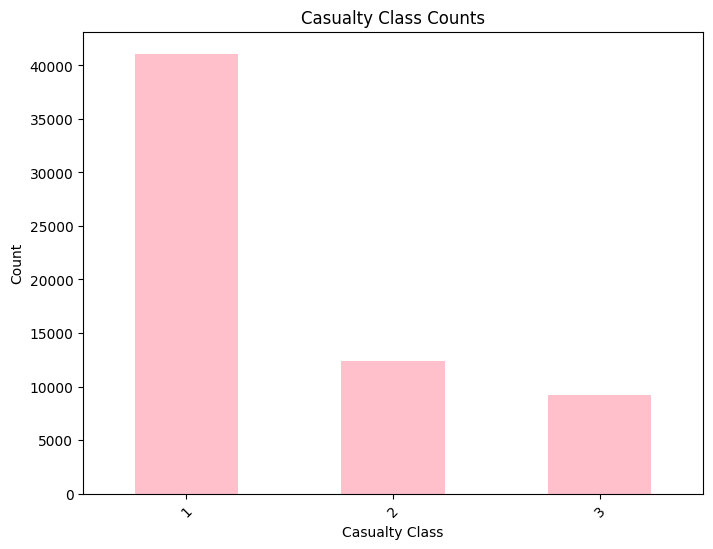

In [11]:
# Bar plot of casualty class counts
casualty_class_counts = df['casualty_class'].value_counts()
plt.figure(figsize=(8, 6))
casualty_class_counts.plot(kind='bar', color='pink')
plt.title('Casualty Class Counts')
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Rows with invalid age values:
      collision_index  collision_year collision_reference  vehicle_reference  \
12      2023010419228            2023           010419228                  1   
13      2023010419228            2023           010419228                  1   
46      2023010419349            2023           010419349                  1   
51      2023010419379            2023           010419379                  2   
72      2023010419418            2023           010419418                  1   
...               ...             ...                 ...                ...   
59647   202363A036623            2023           63A036623                  2   
59743   202363C010023            2023           63C010023                  2   
59813   202363C036523            2023           63C036523                  1   
60788   2023991283620            2023           991283620                  1   
61302   2023991295073            2023           991295073                  2   

       ca

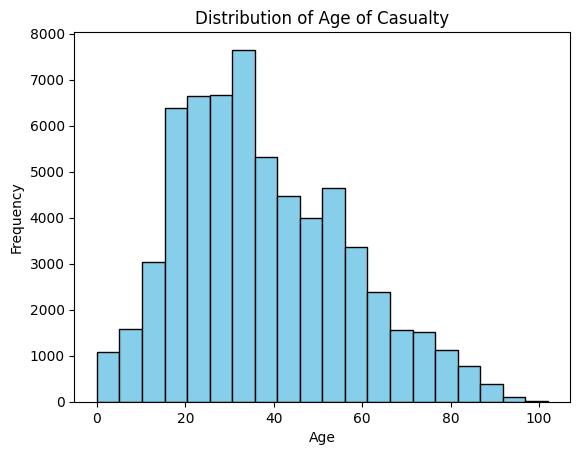

In [12]:

# Identify Invalid Values
invalid_age_rows = df[(df['age_of_casualty'] < 0) | (df['age_of_casualty'] > 103)]  # Adjust upper limit based on domain knowledge
print("Rows with invalid age values:")
print(invalid_age_rows)

#  Replace Invalid Values
df.loc[df['age_of_casualty'] < 0, 'age_of_casualty'] = pd.NA  # Replace negative values with NaN


# Impute missing age values with median age
median_age = df['age_of_casualty'].median()
df['age_of_casualty'].fillna(median_age, inplace=True)

# Step 4: Visualize Distribution
df['age_of_casualty'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age of Casualty')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



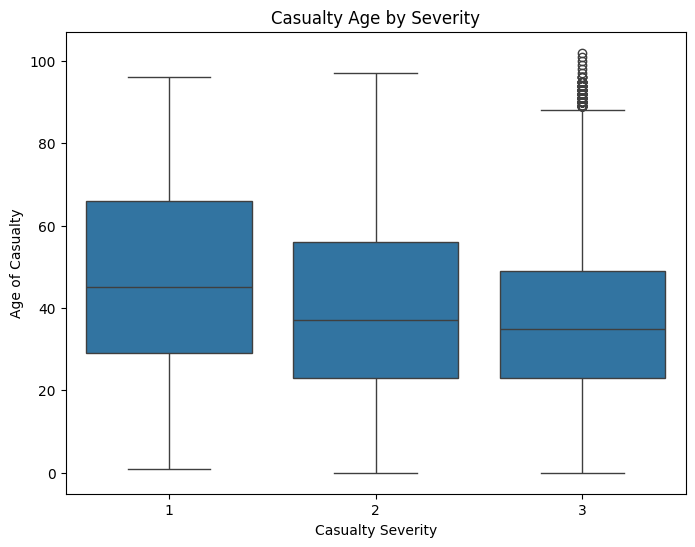

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df)
plt.title('Casualty Age by Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()

In [14]:
# Analysis by gender of casualty
print("\nAnalysis by gender of casualty:")
print(df['sex_of_casualty'].value_counts())

# Analysis by age band of casualty
print("\nAnalysis by age band of casualty:")
print(df['age_band_of_casualty'].value_counts())

# Analysis by pedestrian involvement
print("\nAnalysis by pedestrian involvement:")
print(df['pedestrian_location'].value_counts())

# Analysis by area type of casualty
print("\nAnalysis by area type of casualty:")
print(df['casualty_home_area_type'].value_counts())

# Analysis by IMD decile
print("\nAnalysis by IMD decile:")
print(df['casualty_imd_decile'].value_counts())

# Analysis by casualty type
print("\nAnalysis by casualty type:")
print(df['casualty_type'].value_counts())


Analysis by gender of casualty:
 1    38171
 2    23800
-1      698
 9        5
Name: sex_of_casualty, dtype: int64

Analysis by age band of casualty:
 6     12899
 7      9793
 8      7881
 5      6638
 4      6387
 9      6119
 10     3133
 3      3038
 11     2702
 2      1588
-1      1414
 1      1082
Name: age_band_of_casualty, dtype: int64

Analysis by pedestrian involvement:
 0     53452
 5      3328
 1      1545
 6      1164
 10      911
 9       897
 8       688
 4       581
 7        55
 2        35
 3        17
-1         1
Name: pedestrian_location, dtype: int64

Analysis by area type of casualty:
 1    45544
-1     6628
 3     5883
 2     4619
Name: casualty_home_area_type, dtype: int64

Analysis by IMD decile:
 2     7151
 1     7011
-1     6930
 3     6664
 4     6281
 5     5780
 6     5544
 7     4764
 8     4626
 9     4259
 10    3664
Name: casualty_imd_decile, dtype: int64

Analysis by casualty type:
 9     33417
 0      9221
 1      6951
 3      3963
 5      1738


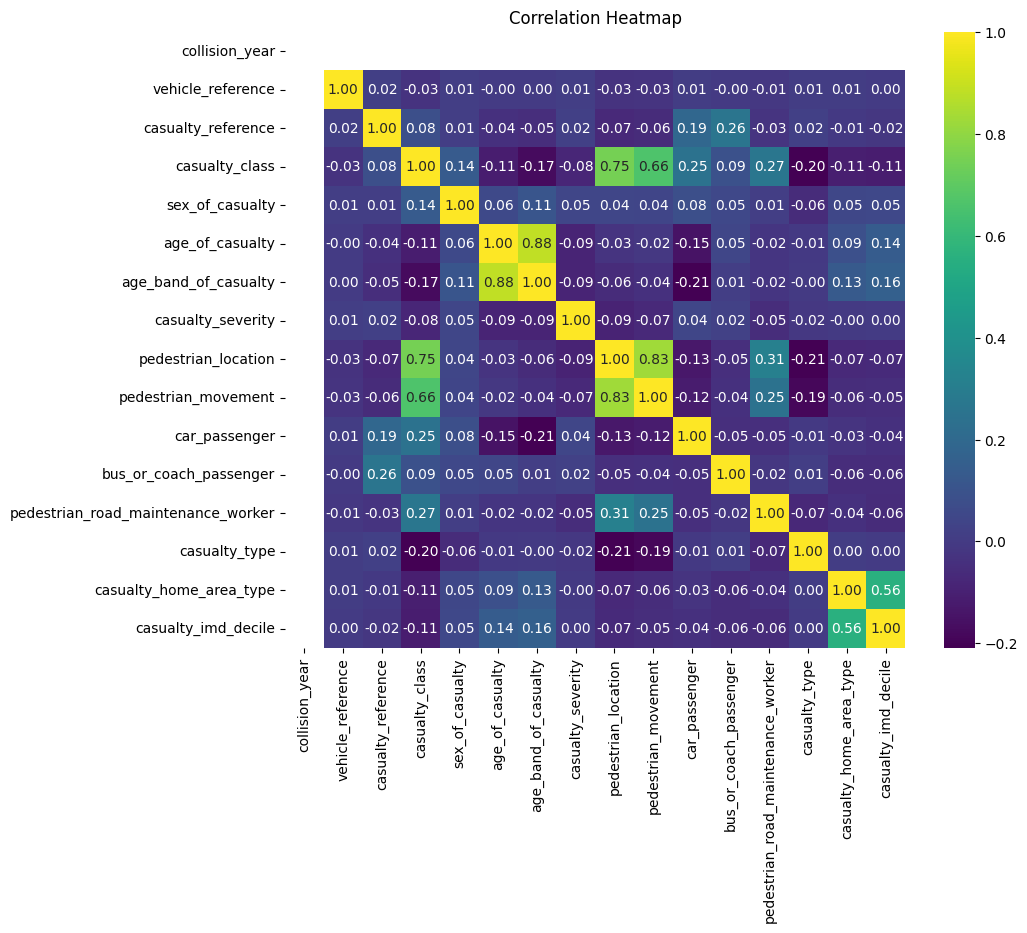

In [15]:
cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()